<a href="https://colab.research.google.com/github/zhouchun0105/Fake-News-Detection-Project-BA865/blob/main/Glove_Embdding_copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [4]:
! pip install spacy-universal-sentence-encoder

     |████████████████████████████████| 6.0 MB 5.4 MB/s 
     |████████████████████████████████| 628 kB 48.3 MB/s 
     |████████████████████████████████| 181 kB 51.5 MB/s 
     |████████████████████████████████| 451 kB 38.2 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 10.1 MB 45.8 MB/s 
     |████████████████████████████████| 462 kB 51.1 MB/s 
  Created wheel for spacy-universal-sentence-encoder: filename=spacy_universal_sentence_encoder-0.4.3-py3-none-any.whl size=14764 sha256=867626f95bf648e88547a464c65231a1cbee02a83c6c6062cc2660b6d28418aa
  Stored in directory: /root/.cache/pip/wheels/ad/b6/25/b72e0f73e0e5ea76ec803d27aa9fe4f17640bc6c109cb3bff4
Successfully built spacy-universal-sentence-encoder
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.

In [5]:
! pip3 install spacymoji==2.0.0
! pip3 uninstall spacy -y
! pip3 install spacy==2.2.2

     |████████████████████████████████| 10.4 MB 3.9 MB/s 
     |████████████████████████████████| 51 kB 7.5 MB/s 
     |████████████████████████████████| 1.0 MB 55.2 MB/s 
     |████████████████████████████████| 184 kB 62.3 MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49734 sha256=8f8b2be6436a207a5100b31c2666d65267f875f53a49d4a48f282e7b444e3527
  Stored in directory: /root/.cache/pip/wheels/4e/bf/6b/2e22b3708d14bf6384f862db539b044d6931bd6b14ad3c9adc
Successfully built emoji
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.2
    Uninstalling srsly-2.4.2:
      Successfully uninstalled srsly-2.4.2
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.6
    Uninstalling catalogue-2.0.6:
      Successfully uninstalled catalogue-2.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.13
    Uninstalling thinc-8.0.13:
      Successfully uninstalled thinc-8.0.13
  Attempting uninstall: spa

In [6]:
! pip install spacy-universal-sentence-encoder[multi]

  Using cached spacy-3.2.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.0 MB)
     |████████████████████████████████| 4.9 MB 4.1 MB/s 
  Using cached thinc-8.0.13-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (628 kB)
  Using cached srsly-2.4.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (451 kB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.3.1
    Uninstalling thinc-7.3.1:
      Successfully uninstalled thinc-7.3.1
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.2
    Uninstalling spacy-2.2.2:
      Successfully uninstalled spacy-2.

In [7]:
# imports 
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy import cli
from spacy import displacy
#import spacy_universal_sentence_encoder

try:
    from scikeras.wrappers import KerasRegressor                     
except ImportError:
    !pip install scikeras
    from scikeras.wrappers import KerasRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV

from wordcloud import WordCloud

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.1
    Uninstalling importlib-metadata-4.11.1:
      Successfully uninstalled importlib-metadata-4.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [8]:
# Mounting Google Drive locally
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Setup and Data Cleaning

In [9]:
# Import data 
df_fakenews_true = pd.read_csv("gdrive/Shared drives/BA865 Group Project/News _dataset/True.csv")
df_fakenews_fake = pd.read_csv("gdrive/Shared drives/BA865 Group Project/News _dataset/Fake.csv")

In [10]:
df_fakenews_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
df_fakenews_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
df_fakenews_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [13]:
df_fakenews_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [14]:
print(df_fakenews_true.shape)
print(df_fakenews_fake.shape)

(21417, 4)
(23481, 4)


In [15]:
# checking for any null values
df_fakenews_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [16]:
# checking for any null values
df_fakenews_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

# Data Pre-Processing

In [17]:
# creating new colum 'Real/Fake', labeling the two datasets in order to merge and know which observation is real and which one is false
df_fakenews_true['real/fake'] = '1'
df_fakenews_fake['real/fake'] = '0'

In [18]:
# merging the two datasets
frames = [df_fakenews_true, df_fakenews_fake]
news_data_all = pd.concat(frames)
news_data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   real/fake  44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [19]:
news_data_all.head()

,title,text,subject,date,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [20]:
# date column Split to see if there are seasonal trends
# splitting the Year, the Month and Day Data
date_split1 = news_data_all['date'].str.split(',', expand=True)
news_data_all['Year'] = date_split1[1]

date_split2 = news_data_all['date'].str.split(' ', expand=True)
news_data_all['Month'] = date_split2[0]
news_data_all['Day'] = date_split2[1]
news_data_all['Day'] = news_data_all['Day'].replace(',','', regex=True)


In [21]:
# dropping date column 
news_data_all = news_data_all.drop('date', axis=1)
news_data_all.head()

,title,text,subject,real/fake,Year,Month,Day
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,2017,December,31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,2017,December,29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,2017,December,31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,2017,December,30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,2017,December,29


In [22]:
news_data_all.describe()

,title,text,subject,real/fake,Year,Month,Day
count,44898,44898,44898,44898,44853,44898,44854
unique,38729,38646,8,2,5,35,32
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,0,2017,November,13
freq,14,627,11272,23481,16701,4388,1651


In [23]:
# one-hot encoding for subject column
news_data = pd.get_dummies(news_data_all, columns=["subject"])

In [24]:
# title and text can be two seperate variables
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   real/fake                44898 non-null  object
 3   Year                     44853 non-null  object
 4   Month                    44898 non-null  object
 5   Day                      44854 non-null  object
 6   subject_Government News  44898 non-null  uint8 
 7   subject_Middle-east      44898 non-null  uint8 
 8   subject_News             44898 non-null  uint8 
 9   subject_US_News          44898 non-null  uint8 
 10  subject_left-news        44898 non-null  uint8 
 11  subject_politics         44898 non-null  uint8 
 12  subject_politicsNews     44898 non-null  uint8 
 13  subject_worldnews        44898 non-null  uint8 
dtypes: object(6), uint8(8)
memory usage: 2

# GLOVE EMBEDDING

In [56]:
df=news_data.copy()

In [57]:
df["text"] = df['title'].astype(str) +"-"+ df["text"]
df['real/fake']=df['real/fake'].astype(int)
df=df.drop(columns='title')

In [81]:
label=df['real/fake']
label.dtype


dtype('int64')

In [59]:
text_vectorization = keras.layers.TextVectorization(
    max_tokens=2000, # adding more tokens to allow for increase due to bigrams.
    output_mode="int", # This is requesting integer encodings (which means we'll have a sequence of integers)
)

text_vectorization.adapt(df['text'])

In [60]:
review_text = df.loc[0,'text']
print(f'REVIEW TEXT: \n\n{review_text}')
review_len = len(review_text.replace(',','',regex=True))
print(f'REVIEW DETAILS: \n\nThe review contains roughly {review_len} words (based on white spaces).')
vectorized_review = text_vectorization(df.loc[0,'text']).numpy()
print(f'It\'s vectorized form contains {vectorized_review.shape[0]} tokens.\n') #Including the start index.
print(f'VECTOR REPRESENTATION:\n')
vectorized_review # This text vectorization layer will convert a raw text vector into a sequence of integers.

REVIEW TEXT: 

0    As U.S. budget fight looms, Republicans flip t...
0     Donald Trump Sends Out Embarrassing New Year’...
Name: text, dtype: object
REVIEW DETAILS: 

The review contains roughly 2 words (based on white spaces).
It's vectorized form contains 2 tokens.

VECTOR REPRESENTATION:



array([[ 19,  31, 473, ...,   9,   2, 880],
       [ 72,  15,   1, ...,   0,   0,   0]])

In [61]:
text = df['text'].to_numpy()
print(f'The average review in our data has {np.mean(len(text))} words, and we have {len(df)} samples.')

The average review in our data has 44898.0 words, and we have 44898 samples.


In [62]:
one_hot_review = tf.one_hot(vectorized_review, depth=2000) # Depth is the longest sequence we might encounter - i.e., max tokens in a review.
print(one_hot_review.shape)

(2, 754, 2000)


In [63]:
type(df)

pandas.core.frame.DataFrame

# MODELING

In [66]:
df=df.sample(frac=1)
text = np.array(df['text'])
text = text.reshape(text.shape[0],1) # Note that I need to reshape this thing to explicitly state the second dimension, so Keras takes it.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 6834 to 4654
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   text                     44898 non-null  object
 1   real/fake                44898 non-null  int64 
 2   Year                     44853 non-null  object
 3   Month                    44898 non-null  object
 4   Day                      44854 non-null  object
 5   subject_Government News  44898 non-null  uint8 
 6   subject_Middle-east      44898 non-null  uint8 
 7   subject_News             44898 non-null  uint8 
 8   subject_US_News          44898 non-null  uint8 
 9   subject_left-news        44898 non-null  uint8 
 10  subject_politics         44898 non-null  uint8 
 11  subject_politicsNews     44898 non-null  uint8 
 12  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(4), uint8(8)
memory usage: 2.4+ MB


In [92]:
data_train = text[:22449]
labels_train = label[:22449]
data_test = text[22449:]
labels_test = label[22449:]

In [91]:
labels_train.dtype

dtype('int64')

In [71]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-03-03 15:09:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-03 15:09:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-03 15:09:06--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [72]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt" 
  
embeddings_index = {} 
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1) # Split off only the first element in the row, i.e., the word, keep the remaining values as the vector.
        coefs = np.fromstring(coefs, "f", sep=" ") # Convert the set of numeric values into a numpy array, splitting elements by ' '
        embeddings_index[word] = coefs # Populate our dictionary - for this word (key), the vector representation is this vector (value).
  
glove_vec_lengths = len(coefs)

print(f"Found {len(embeddings_index)} word vectors.")
print(f"GloVe vector representations are {glove_vec_lengths} elements long.")

Found 400000 word vectors.
GloVe vector representations are 100 elements long.


In [73]:
vocabulary = text_vectorization.get_vocabulary()
print(f"Recall that our vocabulary has {len(vocabulary)} tokens in it.")
print(f"Here is the 11th word in our vocabulary: {vocabulary[13]}.") # Recall that the first two indices are reserved for 'padding' and 'UNK'

Recall that our vocabulary has 2000 tokens in it.
Here is the 11th word in our vocabulary: he.


In [74]:
embedding_dim = glove_vec_lengths # The length of the vector representations; the latent embedding space will be in 100 dimensions. 

vocabulary = text_vectorization.get_vocabulary() # From the vocabulary our text vectorizer learned from our dataset, go over every word.
word_index = dict(zip(vocabulary, range(len(vocabulary)))) # Make a dictionary, key is word to value is index.

# Instantiate a matrix of values (these will be the 'weights' in our embedding layer)
embedding_matrix = np.zeros((len(vocabulary), embedding_dim)) # It will be the 2000 tokens by 100 (length of GloVe vectors)
for word, i in word_index.items():
    if i < len(vocabulary):
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Here is the GloVe vector embedding for 'room'
embedding_matrix[13]

array([ 0.1225    , -0.058833  ,  0.23658   , -0.28876999, -0.028181  ,
        0.31524   ,  0.070229  ,  0.16447   , -0.027623  ,  0.25213999,
        0.21174   , -0.059674  ,  0.36133   ,  0.13607   ,  0.18754999,
       -0.1487    ,  0.31314999,  0.13368   , -0.59702998, -0.030161  ,
        0.080656  ,  0.26161999, -0.055924  , -0.35350999,  0.34722   ,
       -0.0055801 , -0.57934999, -0.88006997,  0.42930999, -0.15695   ,
       -0.51256001,  1.26839995, -0.25228   ,  0.35264999, -0.46419001,
        0.55647999, -0.57555997,  0.32574001, -0.21893001, -0.13178   ,
       -1.1027    , -0.039591  ,  0.89643002, -0.98449999, -0.47393   ,
       -0.12854999,  0.63506001, -0.94888002,  0.40088001, -0.77542001,
       -0.35152999, -0.27788001,  0.68747002,  1.45799994, -0.38474   ,
       -2.89369988, -0.29523   , -0.38835999,  0.94880998,  1.38909996,
        0.054591  ,  0.70485997, -0.65698999,  0.075648  ,  0.76550001,
       -0.63365   ,  0.86556   ,  0.42440999,  0.14796001,  0.41

In [75]:
embedding_layer = layers.Embedding(
    len(vocabulary), # 2000 words.
    glove_vec_lengths, # Vectors of 100 elements per word.
    embeddings_initializer=keras.initializers.Constant(embedding_matrix), # Initialize with fixed values from our matrix.
    trainable=False, # These are weights, but they will be frozen so they don't update during training.
    mask_zero=True, # If we have a 0 token, for padding, we don't pass it through the layer.
)

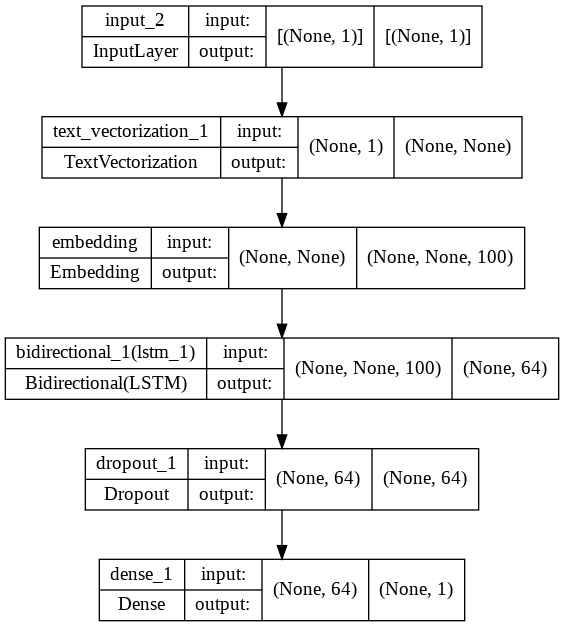

In [76]:
def build_model_GloVe():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input 
    processing = text_vectorization(inputs)
    
    embedding = embedding_layer(processing)
    
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)
    
    model = keras.Model(inputs,outputs)
    model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])
    return model

model_GloVe = build_model_GloVe()

keras.utils.plot_model(model_GloVe, show_shapes=True)

In [95]:
k = 3
num_validation_samples = len(data_train) // k
num_epochs = 2
batch_sizes = 10
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_GloVe()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/2
1497/1497 [==============================] - 1275s 837ms/step - loss: 0.1009 - accuracy: 0.9639 - val_loss: 0.0331 - val_accuracy: 0.9892
Epoch 2/2
1497/1497 [==============================] - 1235s 825ms/step - loss: 0.0382 - accuracy: 0.9884 - val_loss: 0.0263 - val_accuracy: 0.9927
Epoch 1/2
1497/1497 [==============================] - 1227s 815ms/step - loss: 0.0944 - accuracy: 0.9668 - val_loss: 0.0349 - val_accuracy: 0.9877
Epoch 2/2
1497/1497 [==============================] - 1226s 819ms/step - loss: 0.0361 - accuracy: 0.9894 - val_loss: 0.0481 - val_accuracy: 0.9848
Epoch 1/2
1497/1497 [==============================] - 1274s 847ms/step - loss: 0.0929 - accuracy: 0.9677 - val_loss: 0.0297 - val_accuracy: 0.9893
Epoch 2/2
1497/1497 [==============================] - 1250s 835ms/step - loss: 0.0376 - accuracy: 0.9891 - val_loss: 0.0278 - val_accuracy: 0.9896


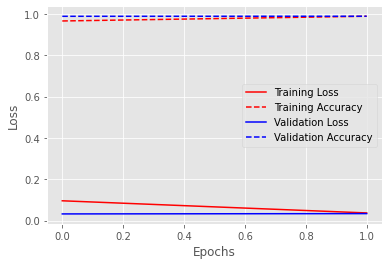

In [96]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

In [97]:
test_acc = model.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

702/702 [==============================] - 214s 304ms/step - loss: 0.0260 - accuracy: 0.9898
The resulting model is about 98.98% accurate in the holdout sample.
